In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import scipy 
import pandas as pd
import os
import matplotlib.dates as mdates

In [2]:
path='g:\\Mi unidad\\Universitat\\[SoSe24] Fundamentals of Earth System data processing\\ESDP_project'
os.chdir(path)

In [3]:
dt13_pf = xr.open_dataset('data/perturbed/enfo_pf_2024_05_13.nc')

In [5]:
lat = 50.94
lon = 6.96

ds = xr.open_dataset('data/perturbed/enfo_pf_2024_05_13.nc')
vx = ds.interp(longitude=lon, latitude=lat)
mean_precipitation = vx.mean(dim='number')
std_precipitation = vx.std(dim='number')


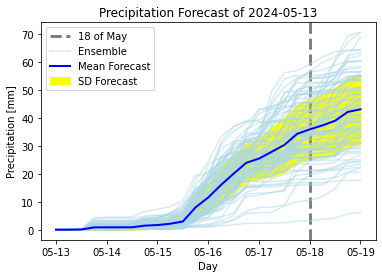

In [225]:

#First we create the plot
fig, ax = plt.subplots()
#first we mark the day we want, the 18 of may
ax.axvline(pd.to_datetime("05/18/2024"),
           linestyle = '--',
           linewidth = 3,
           color='gray',
           label="18 of May")
#to get the label of the ensemble lines, we draw only the first one
ax.plot(vx.time,
        vx.tp.sel(number = vx.number.values[0]),
        color='lightblue',
        alpha=0.5,
        label="Ensemble")
#then we plot all the rest, witout label. i we add a label here, the legend would have too many labels, one for each ensemble
ax.plot(vx.time,
        vx.tp.sel(number = vx.number.values[1:]),
        color='lightblue',
        alpha=0.5)
#here we plot the mean precipitation of the forecast ensemble 
ax.plot(mean_precipitation.time,
        mean_precipitation.tp,
        color='blue',
        linewidth=2,
        label="Mean Forecast")
#here we plot the standar deviation of the  precipitation of the forecast ensemble 
plt.fill_between(mean_precipitation.time, 
                 mean_precipitation.tp-std_precipitation.tp, 
                 mean_precipitation.tp+std_precipitation.tp,
                 color='yellow', 
                 label="SD Forecast",
                 linewidth= 1#,edgecolor= 'black'
                 )
#finally some details
ax.set_title(f"Precipitation Forecast of {str(vx.time.values[0]).partition('T')[0]}")
ax.set_xlabel('Day')
ax.set_ylabel('Precipitation [mm]')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
plt.legend()
plt.show()